## Simple Linear Regression

In [21]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Read the Dataset

In [22]:
import pandas as pd
df= pd.read_csv("50_Startups (1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2- perform basic data quality checks

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

## understanding relationship between RND and PROFIT
PROFIT ~ RND 

<Axes: xlabel='RND', ylabel='PROFIT'>

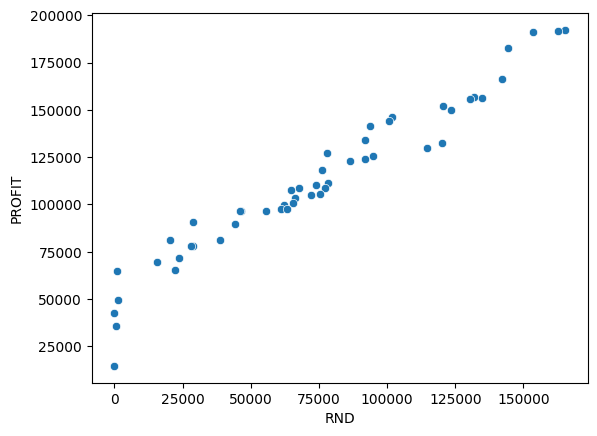

In [27]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

## Step 3 - Seperate X(RND) and Y(PROFIT)

In [26]:
X = df[["RND"]]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [28]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4 - Fit the linear regression model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

## R2 score checking

In [33]:
model.score(X, Y)

0.9465353160804393

# Checking coeffient and intercept of the line

In [34]:
model.coef_

array([[0.85429137]])

In [35]:
model.intercept_

array([49032.89914125])

## PROFIT_est = 49032.9 + 0.8543*RND

 # Model Evaluation

In [ ]:
1 Mean Squared Error (MSE)
2 Root Mean Squared Error (RMSE)
3 Mean Absolute Error (MAE)
4 Mean Absolute Percentage Error (MAPE)
5 R2 Score

In [36]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [37]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [38]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f"Mean Squared Error : {mse:.2f}")

Mean Squared Error : 85120931.33


In [40]:
25**(1/2)

5.0

In [41]:
64**(1/2)

8.0

In [42]:
rmse = mse**(1/2)
print(f"Root Mean Squared Error : {rmse:.2f}")

Root Mean Squared Error : 9226.10


In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
print(f"Mean Absolute error : {mae:.2f}")

Mean Absolute error : 6910.98


In [44]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f"Mean Absolute Percentage error : {mape:.4f}")

Mean Absolute Percentage error : 0.1107


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
print(f"R2 Score : {r2:.4f}")

R2 Score : 0.9465


In [46]:
model.score(X, Y)

0.9465353160804393

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [48]:
def evaluate_model(model, x, y):
    # Predict the results for x
    ypred = model.predict(x)
    # Calculate the metrics
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print all the results
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [49]:
evaluate_model(model, X, Y)

MSE : 85120931.33
RMSE : 9226.10
MAE : 6910.98
MAPE : 0.1107
R2 Score : 0.9465


# R2 score > 0.8 it is a good fit

<Axes: xlabel='RND', ylabel='PROFIT'>

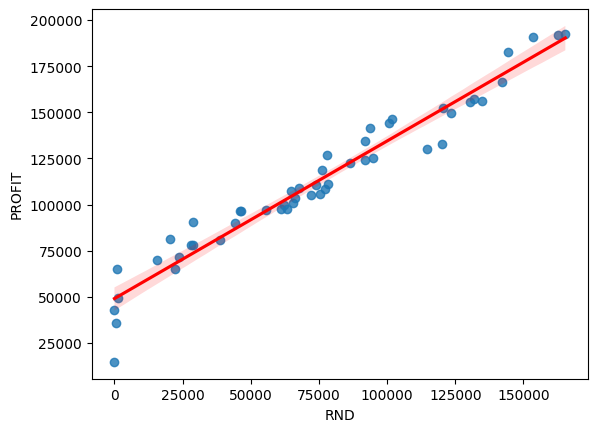

In [50]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

# Out of sample prediction

In [53]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [54]:
rnd = 1_30_000
profit_est = model.predict([[rnd]])
print(f"For given rnd : {rnd}, Profit Estimated is : {profit_est}")

For given rnd : 130000, Profit Estimated is : [[160090.7773633]]
